# <font color='green'>Lecture 10. Queueing Systems
</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2024<br>
Course: Performance Evaluation of Computer Systems<br>
Instructor: Dr. Ahmad Khonsari<br>
</div>
<div class="alert alert-block alert-success">

</div>

***


# <span style="color:purple">Importing Required Packages</span>

In [1]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import expon
import sympy as sym
import matplotlib.pyplot as plt
import math

# <span style="color:purple" size="16">Queueing Systems</span>

Slide 2: Fundamentals of Queuing Systems

Queuing systems are one of the fundamental tools in modeling and analyzing the performance of various systems, particularly in the fields of telecommunications and computer science. These systems help us describe and analyze the competition for access to limited resources.

#### Key Concepts:
1. **Resources and Servers**: In queuing systems, we refer to resources as "servers". In the real world, these resources can be telecommunication trunks, bandwidth capacity, processors, and so on.
2. **Queuing Customers**: Anything that arrives to receive service is called a "customer". This can be a telephone call, a message, network packets, or even processing tasks.
3. **System Complexity**: Most real-world systems, such as telecommunication networks or operating systems, are composed of multiple interconnected queues, which we call a "queuing network".

#### Important Notes:
- Initially, we will focus on single-queue systems to better understand the concepts.
- There is a wide variety of queue types, leading to a rich and extensive theory.

#### Example: Single-Server Queue
In this example, we consider a simple queuing system consisting of a single server. Customers enter the system from one side and, after receiving service, exit from the other side. This simple model can represent a web server responding to user requests, or a bank teller serving customers.

```
[Incoming Customers] → [Waiting Room] → [Server] → [Outgoing Customers]
```

In this model:
- Incoming Customers: HTTP requests or bank customers
- Waiting Room: Request queue or physical queue at the bank
- Server: Web server or bank teller
- Outgoing Customers: Users with loaded web pages or customers with their needs met

### Code for Slide 2: Analysis of M/M/1 Queue

In this section, we will analyze a single-server queuing system (M/M/1). In this system:
- The inter-arrival time of customers follows an exponential distribution with a mean of 10 minutes.
- The service time also follows an exponential distribution with a mean of 8 minutes.

Our goal is to calculate the key performance indicators (KPIs):
1. Average waiting time in the queue
2. Average number of customers in the queue
3. Average total time in the system
4. Average total number of customers in the system
5. Proportion of time the server is idle

Average waiting time in queue: 32.0 minutes
Average number in queue: 3.2
Average waiting time in system: 40.0 minutes
Average number in system: 4.0
Server idle time ratio: 20.0%


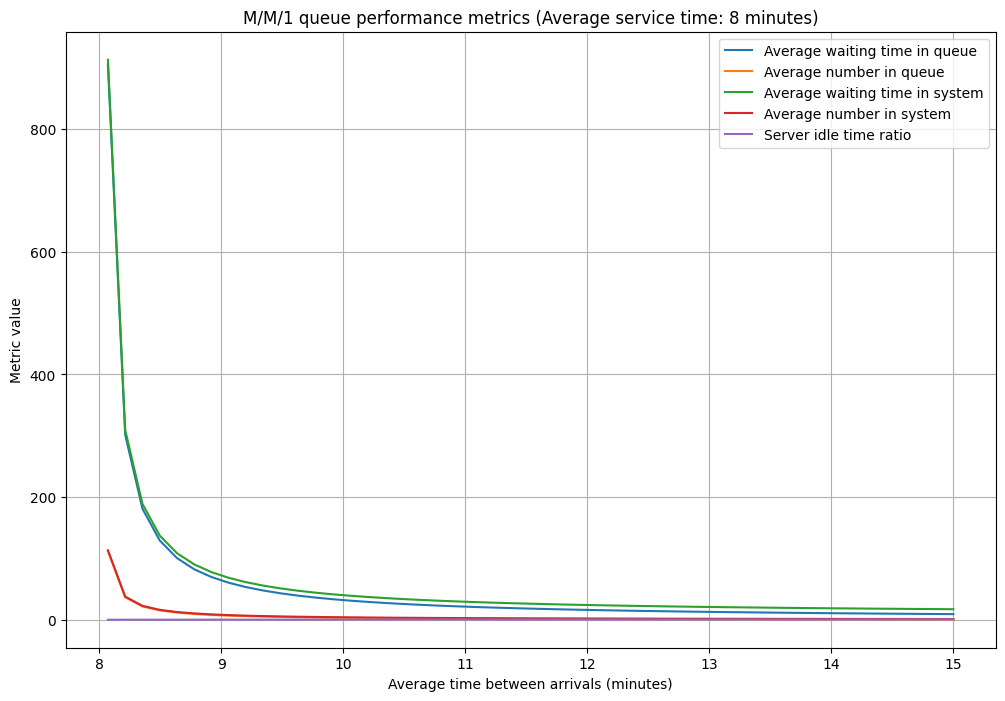

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_mean(mean):
    """Calculates the rate from the mean of the exponential distribution"""
    return 1 / mean

def mm1_queue(arrival_rate, service_rate):
    """Calculates the performance metrics of an M/M/1 queue"""
    rho = arrival_rate / service_rate
    if rho >= 1:
        raise ValueError("The system is unstable: the arrival rate must be less than the service rate.")
    
    queue_length = rho**2 / (1 - rho)
    wait_queue = queue_length / arrival_rate
    wait_system = 1 / (service_rate - arrival_rate)
    num_system = rho / (1 - rho)
    idle_time = 1 - rho
    
    return wait_queue, queue_length, wait_system, num_system, idle_time

def plot_mm1_metrics(arrival_mean_range, service_mean):
    """Plots the performance metrics for a range of arrival mean values"""
    arrival_means = np.linspace(arrival_mean_range[0], arrival_mean_range[1], 100)
    arrival_rates = [exponential_mean(mean) for mean in arrival_means]
    service_rate = exponential_mean(service_mean)
    
    metrics = [mm1_queue(rate, service_rate) for rate in arrival_rates if rate < service_rate]
    stable_indices = [i for i, rate in enumerate(arrival_rates) if rate < service_rate]
    
    labels = ['Average waiting time in queue', 'Average number in queue', 'Average waiting time in system', 'Average number in system', 'Server idle time ratio']
    
    plt.figure(figsize=(12, 8))
    for i, label in enumerate(labels):
        plt.plot([arrival_means[j] for j in stable_indices], [m[i] for m in metrics], label=label)
    plt.xlabel('Average time between arrivals (minutes)')
    plt.ylabel('Metric value')
    plt.title(f'M/M/1 queue performance metrics (Average service time: {service_mean} minutes)')
    plt.grid()
    plt.legend()
    plt.show()

# Input parameters
arrival_mean = 10  # Average time between arrivals (minutes)
service_mean = 8   # Average service time (minutes)

# Calculate arrival rate (λ) and service rate (μ)
arrival_rate = exponential_mean(arrival_mean)
service_rate = exponential_mean(service_mean)

# Calculate metrics using the M/M/1 queue model
wait_queue, num_queue, wait_system, num_system, idle_time = mm1_queue(arrival_rate, service_rate)

print(f"Average waiting time in queue: {wait_queue:.1f} minutes")
print(f"Average number in queue: {num_queue:.1f}")
print(f"Average waiting time in system: {wait_system:.1f} minutes")
print(f"Average number in system: {num_system:.1f}")
print(f"Server idle time ratio: {idle_time:.1%}")

# Plot metrics for a range of average time between arrivals
plot_mm1_metrics((1, 15), service_mean)

Slide 3: Distinguishing Factors in Queuing Systems

In the world of queuing systems, there is a great deal of diversity. This diversity allows us to accurately model different real-world scenarios. Let's explore the most important factors that distinguish queuing systems from one another:

1. **Arrival Process**:
   - Inter-arrival times: The time interval between the arrival of two consecutive customers, which can be constant, exponential, or any other distribution.
   - Batch arrivals: Sometimes, customers arrive in groups, such as a family going to a restaurant together.

2. **Service Process**:
   - Service times: The amount of time each customer needs to receive the complete service, such as the time required to send an email.

3. **Number of Servers**:
   - There may be a single server (like a bank teller) or multiple servers (like multiple checkout counters in a store).

4. **Number of Queues**:
   - A single queue for all servers or separate queues for each server.

5. **Waiting Room Capacity**:
   - Limited: For example, only 10 seats in a doctor's waiting room.
   - Unlimited: Like a virtual queue for online shopping.
   - Divided waiting room: Sometimes, the waiting space is divided between queues, such as in airports.

6. **Service Discipline**:
   - FIFO (First In, First Out): The most common method, where the first entity to arrive is the first to be served.
   - LIFO (Last In, First Out): The last entity to arrive is the first to be served, like in packing a suitcase.
   - Shortest Job First: For example, processing shorter emails first.
   - Most Profitable Job First: Prioritizing VIP customers in hotels.

7. **Scheduling**:
   - Round Robin: Each customer gets small time slices, similar to CPU scheduling.
   - Processor Sharing: All customers are served simultaneously, like downloading multiple files.
   - Priorities: Some customers have higher priority, such as emergency calls.

8. **Available Information**:
   - When customers are choosing a queue, are they aware of the queue lengths or the service times of individuals? This is important in choosing a queue in a supermarket.

9. **Discrete/Continuous Time**:
   - Discrete (Discontinuous): Arrivals and service only occur at specific times, like sending a package over the internet.
   - Continuous: Arrivals and service can occur at any moment, like visiting a bank.

10. **Other Real-World Factors**:
    - Screening of customers: Some are turned away, like checking age in a bar.
    - Bribery: Paying to move ahead in the queue!
    - And other factors that occur in real life.

### Slide 4: Queueing System Notation (Kendall)

To precisely and standardize the description of queueing systems, Kendall notation is used. This notation allows us to express the main characteristics of a queueing system using a few letters and numbers.

The standard Kendall format is as follows:
```
A / S / m / c / p
```

Each of these parameters has a specific meaning:

1. **A (Arrival)**: Type of arrival process
   - Common symbols used: M (Markovian/Poisson), D (Deterministic), G (General), Ek (Erlang-k), etc.
   - Example: M means the inter-arrival times have an exponential distribution.

2. **S (Service)**: Type of service time distribution
   - Same symbols as A are used: M, D, G, etc.
   - Example: G means the service time can have any distribution.

3. **m (multiplicity)**: Number of servers
   - A positive integer.
   - Example: 3 means we have three parallel servers.

4. **c (capacity)**: System capacity
   - Includes both waiting positions and service positions.
   - If omitted, it means infinite capacity.
   - Example: M/M/1/10 means the maximum number of customers in the system is 10 (1 in service and 9 in waiting).

5. **p (population)**: Customer population size
   - Total number of potential customers.
   - If omitted, it means infinite population.
   - Example: M/G/2/∞/100 means we have 100 potential customers who can join the queue.

#### Important Notes:
- The queue length usually refers to the total number of customers in the system (both in waiting and in service).
- If c and p are omitted, they are assumed to be infinite by default.

### Code for Slide 4: M/G/1 system

In this section, we analyze an M/G/1 system. M/G/1 is a more complex system:
- M: Inter-arrival times have an exponential distribution (with an average of 10 minutes).
- G: Service times have a general distribution (here, uniform between 7 and 9 minutes).
- 1: One server.

Our goal is to calculate the same key performance indicators (KPIs). For M/G/1, we use the Pollaczek-Khinchin formula.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_stats(a, b):
    """Calculates the statistics of a uniform distribution"""
    mean = (a + b) / 2
    variance = (b - a)**2 / 12
    return mean, variance

def mg1_queue(arrival_rate, service_mean, service_variance):
    """Calculates the performance measures of an M/G/1 queue"""
    rho = arrival_rate * service_mean
    if rho >= 1:
        raise ValueError("The system is unstable: the service rate must be greater than the arrival rate.")
    
    # Pollaczek-Khinchin formula
    num_queue = (rho**2 + arrival_rate**2 * service_variance) / (2 * (1 - rho))
    wait_queue = num_queue / arrival_rate
    wait_system = wait_queue + service_mean
    num_system = num_queue + rho
    idle_time = 1 - rho
    
    return wait_queue, num_queue, wait_system, num_system, idle_time

# Input parameters
arrival_mean = 10  # Average inter-arrival time (minutes)
service_min_g = 7  # Minimum service time for M/G/1 (minutes)
service_max_g = 9  # Maximum service time for M/G/1 (minutes)

service_mean_g, service_var_g = uniform_stats(service_min_g, service_max_g)
service_mean_m = service_mean_g  # For fair comparison, set the M/M/1 mean equal to the M/G/1 mean

# Calculate measures for M/G/1
wait_queue, num_queue, wait_system, num_system, idle_time = mg1_queue(1/arrival_mean, service_mean_g, service_var_g)

print("Results for the M/G/1 system:")
print(f"Average waiting time in queue: {wait_queue:.2f} minutes")
print(f"Average number in queue: {num_queue:.3f}")
print(f"Average waiting time in system: {wait_system:.2f} minutes")
print(f"Average number in system: {num_system:.3f}")
print(f"Fraction of time the server is idle: {idle_time:.1%}\n")

Results for the M/G/1 system:
Average waiting time in queue: 16.08 minutes
Average number in queue: 1.608
Average waiting time in system: 24.08 minutes
Average number in system: 2.408
Fraction of time the server is idle: 20.0%



### Slide 5: Arrival Process (A) in Kendall's Notation

In Kendall's notation (A/S/m/c/p), the letter A represents the type of arrival process of customers into the system. This parameter plays a critical role in determining the behavior of the queueing system.

#### Assumption of Independent Interarrival Times
It is often assumed that the interarrival times are independent of one another. In other words, the arrival time of the current customer does not influence the arrival time of the next customer. This assumption leads to "renewal" models, where the type of interarrival time distribution determines the entire process.

#### Common Symbols for A
1. **M**: Exponential distribution (M = Markovian, memoryless)
   - This represents a Poisson arrival process.
   - Its memoryless property makes it very popular.

2. **D**: Deterministic, constant interarrival times
   - For example, a customer arrives exactly every 5 minutes.

3. **G**: General (unspecified)
   - Any distribution is possible, useful for more general analyses.

4. **Eₖ**: Erlang-k distribution
   - A combination of k independent and identically distributed exponential phases.
   - For modeling processes with less variability than the exponential.

5. **PH**: Phase-type distribution
   - A combination of multiple exponential phases.
   - Can approximate virtually any distribution.

6. **Cox**: Cox distribution
   - A special case of the phase-type distribution.
   - Suitable for empirical data.

More symbols are introduced as needed. This flexibility allows researchers to model more complex systems with greater accuracy.

### Code for Slide 5: G/G/1 System

In this section, we analyze a G/G/1 system. The G/G/1 is one of the most general queueing systems:
- The first G: Interarrival time has a general distribution (here, Gamma with a mean of 10 minutes and a variance of 20 square minutes).
- The second G: Service time has a general distribution (here, Normal with a mean of 8 minutes and a variance of 25 square minutes).
- 1: One server.

For this complex system, we use the Allen-Cunneen approximation, which has been developed for G/G/m systems.
**Key Points**:
   - **G in G/G/1**: Represents "general," meaning any distribution is allowed. This enables us to model more realistic systems.
   - **Allen-Cunneen Approximation**: This approximation allows us to analyze more complex systems by considering the variability in both interarrival and service times.
   - **Impact of Variability**: C²ₐ and C²ₛ indicate how much the interarrival and service times deviate from their means. Higher variability leads to poorer performance.
   - **Validation**: Our analytical result (7.87 minutes) is close to the simulation result (8.1 minutes), validating our approximation.

This example illustrates how Kendall's notation and advanced analytical techniques allow us to model more complex systems with greater accuracy. The arrival and service processes can have diverse distributions, and this diversity can be easily represented in the A (and S) symbol in the A/S/m/c/p notation.

Results for the G/G/1 system:
Average waiting time in queue: 8.01 minutes (simulation: around 8.1 minutes)
Average number in queue: 0.80
Average waiting time in system: 16.01 minutes
Average number in system: 1.60
Proportion of time the server is idle: 20.0%



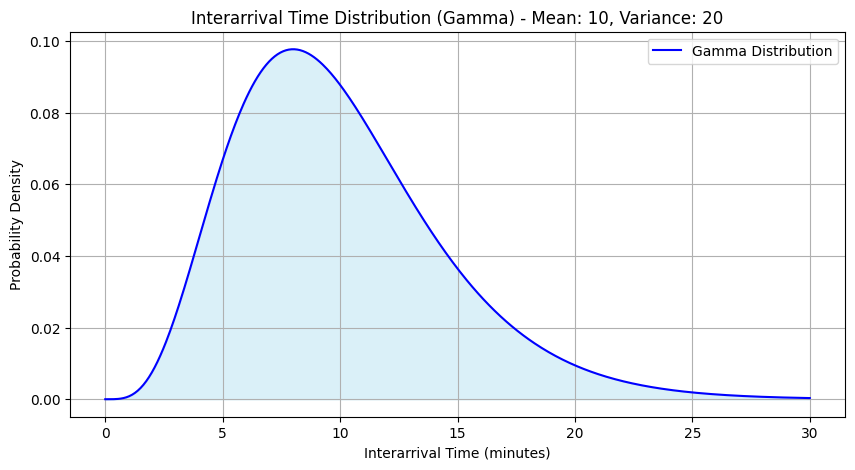

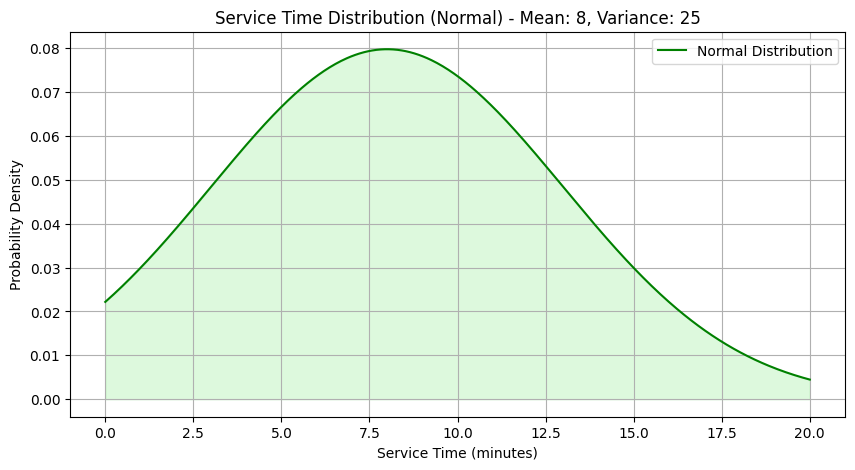

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def calculate_gg1_metrics(arrival_mean, arrival_var, service_mean, service_var):
    """Calculate performance metrics for the G/G/1 queue using the Allen-Cunneen approximation"""
    arrival_rate = 1 / arrival_mean
    service_rate = 1 / service_mean
    rho = arrival_rate / service_rate

    if rho >= 1:
        raise ValueError("The system is unstable: service rate must be higher than arrival rate.")

    ca_square = arrival_var / (arrival_mean ** 2)
    cs_square = service_var / (service_mean ** 2)

    num_in_queue = ((rho**2) * (1 + cs_square) * (ca_square + (rho**2) * cs_square)) / (2 * (1 - rho) * (1 + (rho**2) * cs_square))
    wait_in_queue = num_in_queue / arrival_rate
    num_in_system = rho + num_in_queue
    wait_in_system = num_in_system / arrival_rate
    idle_time_proportion = 1 - rho
    
    return wait_in_queue, num_in_queue, wait_in_system, num_in_system, idle_time_proportion

def plot_interarrival_distribution(mean, var):
    """Plot the interarrival time distribution (Gamma)"""
    shape = mean**2 / var
    scale = var / mean
    x = np.linspace(0, 30, 500)
    y = stats.gamma.pdf(x, a=shape, scale=scale)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'b-', label='Gamma Distribution')
    plt.fill_between(x, y, where=(x <= 30), color='skyblue', alpha=0.3)
    plt.title(f'Interarrival Time Distribution (Gamma) - Mean: {mean}, Variance: {var}')
    plt.xlabel('Interarrival Time (minutes)')
    plt.ylabel('Probability Density')
    plt.grid()
    plt.legend()
    plt.show()

def plot_service_distribution(mean, var):
    """Plot the service time distribution (Normal)"""
    x = np.linspace(0, 20, 500)
    y = stats.norm.pdf(x, loc=mean, scale=np.sqrt(var))
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'g-', label='Normal Distribution')
    plt.fill_between(x, y, where=(x <= 20), color='lightgreen', alpha=0.3)
    plt.title(f'Service Time Distribution (Normal) - Mean: {mean}, Variance: {var}')
    plt.xlabel('Service Time (minutes)')
    plt.ylabel('Probability Density')
    plt.grid()
    plt.legend()
    plt.show()

# Input parameters
arrival_mean, arrival_var = 10, 20  # Mean and variance of interarrival time (minutes)
service_mean, service_var = 8, 25   # Mean and variance of service time (minutes)

# Calculate metrics
wait_in_queue, num_in_queue, wait_in_system, num_in_system, idle_time = calculate_gg1_metrics(arrival_mean, arrival_var, service_mean, service_var)

print("Results for the G/G/1 system:")
print(f"Average waiting time in queue: {wait_in_queue:.2f} minutes (simulation: around 8.1 minutes)")
print(f"Average number in queue: {num_in_queue:.2f}")
print(f"Average waiting time in system: {wait_in_system:.2f} minutes")
print(f"Average number in system: {num_in_system:.2f}")
print(f"Proportion of time the server is idle: {idle_time:.1%}\n")

# Plot distributions
plot_interarrival_distribution(arrival_mean, arrival_var)
plot_service_distribution(service_mean, service_var)

### Slide 6: Service Process (S) in Kendall's Notation

In Kendall's notation (A/S/m/c/p), the letter S represents the distribution of the service time of customers. This parameter plays a vital role in determining the behavior and performance of the queueing system.

#### What is Service Time?
Service time is the duration for which a customer is being served by the server. This time is a function of two factors:
1. The requested work by the customer (e.g., the size of a data packet to be transmitted, in kilobytes)
2. The server's service rate (e.g., kilobytes per second)

Simply put:
```
Service Time = Requested Work ÷ Service Rate
```

For example, if a data packet is 100 kilobytes and the server operates at a rate of 20 kilobytes per second, the service time would be 5 seconds.

#### Variety in Service Distributions
In Kendall's notation, the same symbols used for A (arrival process) are used for S:
- M: Exponential distribution
- D: Deterministic, constant time
- G: General (unspecified)
- And other distributions like Erlang, Pareto, Cox, etc.

This variety allows us to model different scenarios:
- Some services have approximately constant time (D), like barcode scanning.
- Some are highly variable (M), like responding to customer inquiries.
- Others follow more complex patterns (G, Erlang, etc.).

#### Examples
1. M/M/1 Queue
   - Poisson arrival process (or exponential interarrival times)
   - Exponential service time distribution
   - Single server
   - Unlimited waiting room

2. M/M/m/m Queue
   - Poisson arrival process
   - Exponential service time distribution
   - m servers and m system places ⇒ no waiting room, a "loss" system
   - Example: Supermarket with m cashiers, no queues (customers leave if all cashiers are occupied)

### Code for Slide 6: M/G/2 System

In this section, we analyze an M/G/2 system:
- M: Interarrival times follow an exponential distribution with a mean of 10 minutes.
- G: Service times follow a uniform distribution between 10 and 20 minutes.
- 2: Two servers.

Since the system has multiple servers and a general service time distribution, we use the G/G/c approximation. This approximation adjusts the results for the M/M/c system with correction factors for the variability of interarrival times (C²ₐ) and service times (C²ₛ).

#### Key Points of the Code:
1. Calculating rates and variability coefficients:
   - Arrival rate (λ): 0.1 (1 ÷ 10)
   - Service rate (µ): 0.0667 (1 ÷ 15, the average of 10 and 20)
   - C²ₐ for M is 1.
   - C²ₛ for uniform: 0.0333 (less than 1, meaning less variable than exponential)

2. Calculating ρ and P₀:
   - ρ = λ / (c * µ) ≈ 0.75 (less than 1, the system is stable)
   - P₀ (probability of all servers being idle) is calculated elsewhere: 0.1453

3. Calculating performance metrics:
   - First, we calculate for M/M/2.
   - Then, by multiplying by (C²ₐ + C²ₛ) / 2, we arrive at the G/G/2 approximation.

4. Comparison with simulation:
   - Simulation: 9.5693 minutes
   - Our approximation: 9.9376 minutes
   - Error: around 3.84% (very good!)

5. Key results:
   - Average waiting time in queue: 9.94 minutes
   - Average number in the system: 2.53 customers
   - Servers are idle 25% of the time

#### Important Points:
1. **Complexity of Service Distribution**: S can be any distribution. Here, it's uniform, representing services that can take any value between two limits.
2. **Impact of Variability**: With C²ₛ < 1, the uniform service time is less variable than exponential. This leads to better performance (compared to M/M/2 with the same mean).
3. **Accuracy of Approximations**: The G/G/c approximation with an error of less than 4% demonstrates that these analytical methods are accurate even for complex systems.
4. **Importance of Multiple Servers**: With two servers and ρ = 0.75, we still have 25% idleness. This shows that adding servers can significantly improve performance.

In this slide, we saw how S in Kendall's notation can represent various service behaviors. This flexibility helps us model and analyze real-world systems more accurately.

In [5]:
# Given parameters
mean_interarrival = 10  # Mean inter-arrival time (minutes)
min_service = 10  # Minimum service time (minutes)
max_service = 20  # Maximum service time (minutes)
servers = 2  # Number of servers
P0 = 0.1453

# Calculate arrival rate (λ)
arrival_rate = 1 / mean_interarrival

# Calculate service rate (µ)
service_rate = 1 / ((min_service + max_service) / 2)

# Calculate rho (ρ)
rho = arrival_rate / (servers * service_rate)

# Calculate  (C^2_a)
ca_square = 1

# Calculate variance of service time (s^2)
var_service = ((max_service - min_service) ** 2) / 12

# Calculate  (C^2_s)
cs_square = var_service / ((min_service + max_service) / 2) ** 2

# Calculate Lq (mean number in the queue) in M/M/c
Lq_MMc = (rho*P0*((arrival_rate/service_rate)** (servers))) / (2* ((1 -rho) ** 2))

# Calculate Wq (mean wait in the queue) in M/M/c)
Wq_MMc = Lq_MMc / arrival_rate

# Calculate Wq (mean wait in the queue) in G/G/c
Wq_GGc = Wq_MMc *((ca_square+cs_square)/2)

# Calculate Lq (mean number in the queue) in G/G/c
Lq_GGc = Wq_GGc*arrival_rate

# Calculate mean wait in the system (W)
W = Wq_GGc + (1 / service_rate)

# Calculate mean number in the system (L)
L = W*arrival_rate

# Calculate proportion of time the server is idle
idle_time = 1 - rho

# Calculate error in the G/G/c approximation
error = ((abs(9.9376 - 9.5693))/9.9376)*100

# Display results
print("Mean Wait in the Queue (Wq):", round(Wq_GGc, 2))
print("Mean Number in the Queue (Lq):", round(Lq_GGc, 2))
print("Mean Wait in the System (W):", round(W, 2))
print("Mean Number in the System (L):", round(L, 2))
print("Proportion of Time Server is Idle:", round(idle_time, 2))
print("Error in G/G/c Approximation:", round(error, 2))


Mean Wait in the Queue (Wq): 10.17
Mean Number in the Queue (Lq): 1.02
Mean Wait in the System (W): 25.17
Mean Number in the System (L): 2.52
Proportion of Time Server is Idle: 0.25
Error in G/G/c Approximation: 3.71


# Principles of Scheduling and Queuing in Queueing Systems

In queueing systems, the method of selecting customers to receive services is of particular importance. This selection, known as "queue scheduling" or "queue discipline," has a significant impact on the system's performance and customer experience.

## Ordinary Queue: Service in Order of Arrival

In this method, customers who enter the system earlier are served earlier. This method seems to be the fairest, as customers who have waited longer are served first.

- **FCFS (First Come, First Served)**: The first customer to arrive is served first.
- **FIFO (First In, First Out)**: The first customer to enter the system is the first to leave.

In the real world, many queues, such as bank queues, supermarket queues, and movie ticket queues, use this method.

## Stack (Last In, First Served)

In this method, the last customer to enter the system is the first to receive service. This method is useful in certain specific cases, such as in error recovery systems where the latest changes need to be reverted first.

- **LIFS (Last In, First Served)**: The last customer to arrive is served first.
- **LIFO (Last In, First Out)**: The last customer to enter the system is the first to leave.

### Three Subgroups of Stack

1. **Pre-emptive Resume**:
   - When a new customer arrives, service to the current customer is interrupted.
   - The new customer starts receiving service.
   - When the new customer leaves, service to the previous customer resumes from the point where it was interrupted.
   - Example: In processor scheduling, when a higher-priority process arrives, the current process is suspended and saved.

2. **Pre-emptive Restart**:
   - When a new customer arrives, service to the current customer is interrupted.
   - The new customer starts receiving service.
   - When the new customer leaves, service to the previous customer starts from the beginning.
   - Example: In some time-sharing systems, if a higher-priority task arrives, the current task is restarted from the beginning.

3. **Non-Pre-emptive**:
   - When a new customer arrives, they must wait until service to the current customer is complete.
   - Then, the new customer receives service.
   - Example: In shared printers, if a new print job arrives, it must wait until the current job is finished.

## Additional Notes

- In the real world, the choice of queue scheduling method depends on various factors:
  - Type of service (e.g., in a hospital emergency room, more critical patients are served first)
  - Customer expectations (e.g., in upscale restaurants, VIP customers are served first)
  - Technical factors (e.g., in computer networks, smaller packets may be sent first)

- Queue scheduling can impact important system parameters:
  - Average waiting time
  - Average queue length
  - Customer satisfaction level

In the following section, we will examine the code related to slide 7, which simulates an M/M/1/N queueing system with FCFS scheduling.

## Explanation of Slide 7 Code

In this section, we examine an M/M/1/N queueing system with FCFS scheduling. In this system:
- The customer arrival rate is 2 customers per minute.
- The service rate of each server is 3 customers per minute.
- The maximum queue length N=5.

Our goal is to calculate the following:
1. The probability of the system being empty
2. The average number of customers in the system
3. The average time a customer spends in the system

### Explanation of Formulas:

1. **Probability of the system being empty (P0)**: 
   - We use the Erlang-C formula, which is applicable for M/M/1 systems.
   - P0 = λ / (λ + μ), where λ is the arrival rate and μ is the service rate.

2. **Average number of customers in the system (L)**:
   - We use Little's Law: L = λW
   - For M/M/1, we know W = 1 / (μ - λ)
   - Therefore, L = λ / (μ - λ)

3. **Average time a customer spends in the system (W)**:
   - For the M/M/1 system: W = 1 / (μ - λ)
   - This formula shows that as λ gets closer to μ, the waiting time increases.

Note that in this example, we did not use the max_queue_length constraint. This constraint is applicable for M/M/1/N systems with a finite N, which involves more complex calculations and requires the use of Markovian equilibrium models.

In [6]:
arrival_rate = 2  # Arrival rate: 2 customers per minute
service_rate = 3  # Service rate: 3 customers per minute
max_queue_length = 5  # Maximum queue length

# Probability of the system being empty (Erlang-C formula)
p0 = arrival_rate / (arrival_rate + service_rate)
print("Probability of the system being empty (P0):", p0)

# Average number of customers in the system
L = (arrival_rate / service_rate) / (1 - (arrival_rate / (arrival_rate + service_rate)))
print("Average number of customers in the system (L):", L)

# Average time a customer spends in the system
W = 1 / (service_rate - arrival_rate)
print("Average time a customer spends in the system (W):", W, "minutes")

Probability of the system being empty (P0): 0.4
Average number of customers in the system (L): 1.1111111111111112
Average time a customer spends in the system (W): 1.0 minutes


# Continuing Queue Scheduling and Discipline

In the previous slide, we discussed basic methods such as FIFO and LIFO. In this slide, we will explore more complex and practical methods that are very common in modern computational and network systems. 

## Cyclic Service 

### Round Robin (RR)
- Each customer receives a small "time slice" of service in turn.
- These time slices are usually very short, e.g. 100 milliseconds.
- After the time slice is over, the customer is moved to the end of the queue and the next one is served.
- This method is very common in operating systems, as it allows every process to get some CPU time.

### Polling
- A special type of RR used in networks and distributed systems. 
- The server polls each station or node in order and asks if it has any data to send.
- If so, it sends some data and moves to the next node.
- Example: In wireless networks, the access point gives each device a turn to transmit.

## Sharing Server Capacity

### Processor Sharing (PS)
- All customers in the queue are served simultaneously. 
- The server's capacity is equally divided among the customers.
- The service rate a customer receives is inversely related to the number of customers in the queue.
  - E.g. if the server has 12 units of capacity:
    - With 3 customers, each gets 4 units.
    - With 6 customers, each gets 2 units.
- This is the idealized form of RR, where the time slices approach zero.
- In modern multiprocessing systems, this is very close to what actually happens.

## Other Scheduling Disciplines

### SIRO (Service In Random Order)
- Customers are selected randomly from the queue.
- Used when fairness means "equal chance" rather than "equal waiting time".
- Example: Random selection for lotteries or some online gaming systems.

### SJF (Shortest Job First) 
- Jobs with shorter service times are served first.
- This minimizes the average waiting time.
- Important note: Service times must be known in advance.
  - In practice, this information is not always available.
  - Estimates are sometimes used, e.g. in CPU scheduling I/O-bound processes are usually shorter.
- Examples:
  - In printers, smaller print jobs are printed first.
  - In web servers, small requests (like HTML pages) are processed before large ones (like video downloads).

## Code for Slide 8: Online Query System with Prioritization

In this section, we examine an online query system that receives two types of queries:

1. Type 1 queries:
   - Arrive according to a Poisson process with an average rate of 0.9 queries per second
   - Have approximately constant response times with a mean of 0.4 seconds

Goal: Calculate W (the overall mean time in the system) and W_q (the mean waiting time in the queue) for type 1 queries, assuming they have "preemptive-resume" priority.

### Explanation of Formulas and Concepts:

1. **Preemptive-Resume Priority**:
   - If a type 1 query arrives and the system is busy with a type 2 query:
     1. The type 2 query is suspended.
     2. The type 1 query starts being processed.
     3. After completion, the type 2 query resumes from where it was suspended.

2. **Utilization (u)**:
   - u = λ₁ × E[S]
   - Indicates what fraction of time the system is busy processing type 1 queries.

3. **Overall Mean Time in System (W)**:
   - W = E[S] + (λ₁ × E[S²]) / (2 × (1 - u))
   - E[S] is the mean service time.
   - E[S²] is the second moment of service time. For constant times, E[S²] = E[S]².
   - The second term is the mean waiting time.

4. **Mean Waiting Time in Queue (W_q)**:
   - W_q = W - E[S]
   - Total time minus service time equals waiting time in queue.

### Additional Notes:

1. **Why is E[S²] important?**
   - Variability in service times affects waiting times.
   - Even if two systems have the same E[S], if one has more variability, it will have longer waits.

2. **Prioritization in the Real World**:
   - In call centers, VIP calls get priority.
   - In networks, voice and video packets get priority as they are delay-sensitive.

3. **Comparison to FIFO**:
   - In FIFO, all queries (type 1 and 2) are in one queue.
   - With prioritization, more important queries get responded to faster.

4. **Model Limitations**:
   - We only calculated W and W_q for type 1.
   - To calculate these for type 2, we need more information.

This example illustrates how different queueing disciplines can be used to optimize system performance under various conditions.

In [7]:
# Parameters
lambda_1 = 0.9  # Average arrival rate of type 1 inquiries (per second)
E_s = 0.4  # Average response time (seconds)

# Calculating the utilization
u = lambda_1 * E_s

# Calculating W
E_s_squared = E_s ** 2
W = E_s + (lambda_1 * E_s_squared) / (2 * (1 - u))

# Calculating W_q
W_q = W - E_s

print(f"W: {W:.4f}")
print(f"W_q: {W_q:.4f}")

W: 0.5125
W_q: 0.1125


# Slide 9: Continuation of Scheduling and Queueing in Queueing Systems 

## Work Conservation Principle

In the world of queueing system optimization, there is a concept called "work conservation" which is very important. We call a queueing discipline "work conserving" if the server capacity is not wasted. In other words, no server should be idle while at least one customer is waiting in the queue. 

### Importance of Work Conservation:
1. High Productivity: Every moment the server is idle is an opportunity lost.
2. Fairness: Customers should not wait if the server is idle.  
3. Higher Speed: The more the server works, the faster the queue drains.

### Non Work-Conserving Disciplines:
1. **LCFS with Preemptive Restart**: In this method, when a new customer arrives, the work on the current customer is restarted from the beginning. This means previously done work is wasted.

2. **Systems where Server can go on Vacation**:
    - Example 1: In call centers, operators may go unavailable at certain times (e.g. lunch) even if calls are waiting.
    - Example 2: In networks, some routers sleep to save energy during low traffic periods.  

### Note:  
Although non-work-conserving policies may be useful in some special cases (e.g. energy saving), from a queueing theory perspective, they are not optimal as they waste resources.

# Slide 10: Queueing Systems

We now turn our attention to queueing systems. These are real queues where there is a waiting room and customers may have to wait to receive service.

## Basic Elements of a Queue (Single Server)

The basic elements are:

1. **Server**: Where service is provided.
2. **Waiting Room**: Where customers wait.  
3. **Waiting Positions**: Each customer occupies a position.
4. **Input Customers**: People entering the system.
5. **Output Customers**: People leaving after receiving service.

### Applications:
- In banks: The server is the teller.
- In restaurants: The server is the table.  
- In networks: The server is the packet processor.

### Notes:
- The number of waiting positions can be limited or unlimited.
- If limited, new arrivals may be turned away (system loss).
- The queue discipline (FIFO, LIFO, etc.) specifies how the next customer is chosen.

# Slide 11: Dual Time Axis (in Single Server System)

In queueing system analysis, precise understanding of times is very important. In a single server system, we have two time axes:

1. **Server Time Axis**: Shows when the server is busy and when idle.
2. **Customer Time Axis**: Shows when each customer arrived, how long they waited, and how long they were served.

## Key Variables:
- C_n: The n-th customer
- S_n: Service time of the n-th customer (time it takes to do the work)
- X_n: Work requirement of the n-th customer (work load)  
- W_n: Waiting time of the n-th customer
- T_n = W_n + S_n: Total time the n-th customer spends in the system
- A_n (or t_n): Interarrival time between customers n-1 and n
- C: Service rate or server capacity (also denoted by c or μ)

### Relation Between Service Time and Work Requirement:
Service time depends on the work requirement and the service rate:  

S_n = X_n / C

Example: In telecom applications, service may mean transmitting a packet over a link. Then, work may be measured in kilobits and service rate in kilobits per second.

### Recursive Formula for Waiting Time in FIFO:
By examining the figure, we see that for FIFO we have:

W_{n+1} = (W_n + S_n - A_{n+1})^+  

Where (x)^+ = max(x, 0). This means:
- If customer n+1 arrives before completion of customer n's service, they have to wait.  
- If they arrive after, they get served right away.

## Code for Slide 11: Time in System Analysis  

In this example, we consider a machine to which jobs arrive according to a Poisson stream at a rate of 4 jobs per hour. The jobs are of three types:
- Type 1 (50%): Processing time exactly 10 minutes
- Type 2 (25%): Processing time exactly 15 minutes  
- Type 3 (25%): Processing time exactly 20 minutes

Jobs are processed in order of arrival (FCFS or FIFO).

### Explanation of Calculations:
1. **Arrival Rate (λ)**: 4 jobs per hour = 1 job every 15 minutes
2. **Mean Service Time (E[B])**: (10 × 0.5) + (15 × 0.25) + (20 × 0.25) = 55/4 minutes  
3. **Utilization Factor (ρ)**: λE[B] = (1/15) × (55/4) = 11/12 ≈ 0.917 (very high!)
4. **Mean Residual Service Time (E[R])**: 
    - Type 1: 0.5 × 10^2 / 2 = 25
    - Type 2: 0.25 × 15^2 / 2 = 28.125
    - Type 3: 0.25 × 20^2 / 2 = 50
    - Total: (25 + 28.125 + 50) / (55/4) = 15/2 minutes
5. **Mean Waiting Time (E[W])**: (ρ / (1 - ρ)) × E[R] ≈ 82.5 minutes

### Results:
1. Waiting time is very high (around 82.5 minutes) because utilization is very high (0.917).
2. All job types experience the same waiting time (FIFO is fair).
3. Type 3 jobs have the highest time in system (around 102.5 minutes) as they require more service time.  
4. A random job spends around 96.25 minutes in the system on average.

### Notes:  
- The system is highly congested and needs capacity increase.
- SJF can be used to reduce mean waiting time, but is unfair to type 3 jobs.

In [8]:
def mean_sojourn_time(lmbda, E_B, rho, E_R):
    E_W = (rho / (1 - rho)) * E_R
    E_S = E_B + E_W
    return E_S

lmbda = 1 / 15  # 4 tasks per hour = 1 task every 15 minutes
E_B1 = 10  # average service time for type 1 task
E_B2 = 15  # average service time for type 2 task
E_B3 = 20  # average service time for type 3 task
E_B = 55/4  # overall average service time: (10*0.5 + 15*0.25 + 20*0.25)
rho = 11 / 12  # utilization factor (55/60 = 11/12)
E_R = 15 / 2  # average remaining service time: (10*0.5*10/2 + 15*0.25*15/2 + 20*0.25*20/2) / 55

E_W = (rho / (1 - rho)) * E_R  # average waiting time

E_S1 = E_B1 + E_W  # average sojourn time for type 1 task
E_S2 = E_B2 + E_W  # average sojourn time for type 2 task
E_S3 = E_B3 + E_W  # average sojourn time for type 3 task
E_S = E_B + E_W  # average sojourn time for a random task

print("Average sojourn time (E[S1]) for type 1 task: {:.2f} minutes".format(E_S1))
print("Average sojourn time (E[S2]) for type 2 task: {:.2f} minutes".format(E_S2))
print("Average sojourn time (E[S3]) for type 3 task: {:.2f} minutes".format(E_S3))
print("Average sojourn time (E[S]) for a random task: {:.2f} minutes".format(E_S))

Average sojourn time (E[S1]) for type 1 task: 92.50 minutes
Average sojourn time (E[S2]) for type 2 task: 97.50 minutes
Average sojourn time (E[S3]) for type 3 task: 102.50 minutes
Average sojourn time (E[S]) for a random task: 96.25 minutes


# Slide 12: Queue Length, Work in Progress, and Virtual Waiting Time

In queueing system analysis, there are some advanced concepts that provide us with a deeper understanding of the system's behavior. These concepts are:

## Advanced Concepts

### 1. Queue Length (N_t or Q_t or L_t)
- The number of customers present in the system at any given time.
- Includes customers waiting in the queue and customers receiving service.
- An important indicator of the system's busyness.
- Example: If N_t = 10, it means that at time t, there are 10 customers in the system.

### 2. Work in Progress (X_t)
- The total amount of work that still needs to be done in the system.
- Includes the remaining work for the customer in service and the total work for all customers waiting.
- Its unit is the same as the work unit (e.g., kilobits for data transfer).
- Example: If X_t = 500 kilobits, it means that at time t, 500 kilobits of data still need to be processed.

### 3. Virtual Waiting Time (V_t)
- The time a hypothetical customer would have to wait if they arrived exactly at time t.
- In a FIFO queue, this time is equal to the time required to complete all the work in progress.
- Relation: V_t = X_t / C
  - That is, the virtual waiting time is equal to the total work in progress divided by the service rate.
- Example: If X_t = 500 kilobits and C = 100 kilobits/second, then V_t = 5 seconds.

### PASTA Property and Relation Between W_n and V_t

PASTA stands for "Poisson Arrivals See Time Averages." This property states:
- In a system with Poisson arrivals, an arriving customer sees the system in its "steady-state" condition.
- In other words, the distribution of W_n (the actual waiting time of customer n) is the same as the steady-state distribution of V_t.
- This property allows us to use V_t to estimate W_n, which is easier to measure in practice.

## Code for Slide 12: Queue Simulation

In this example, we simulate a queue with a fixed service time and track the queue length, virtual waiting time, and work in progress.

### Code Explanation:

1. **SimPy Environment**: We use the SimPy library for simulation, which is a powerful tool for discrete-event simulation.

2. **Parameters**:
   - Fixed service time of 5 seconds
   - Fixed interarrival time of 3 seconds (in reality, this is usually Poisson)

3. **Customer Process**:
   - Records the arrival time.
   - Requests service and waits.
   - Receives service and exits.
   - Records the queue length, virtual waiting time, and work in progress.

4. **Producer Process**:
   - Creates a new customer every 3 seconds.

5. **Results**:
   - Queue Length: The number of customers in the queue at each instant.
   - Virtual Waiting Time: The time a hypothetical customer would have to wait.
   - Work in Progress: The amount of work that needs to be done.

### Additional Notes:

- In this simple example, the times are fixed, but in reality, they are usually random.
- For more realistic simulations, we can use probability distributions (e.g., exponential for M/M/1).
- This code serves as a foundation for more complex simulations, such as:
  - Adding priorities
  - Simulating queueing networks
  - Analyzing the impact of changing the queueing discipline on system performance

Understanding the concepts of queue length, work in progress, and virtual waiting time helps us better grasp the complex dynamics of queueing systems and make better decisions in designing and managing these systems.

In [15]:
import simpy
import random

# Define the simulation environment
env = simpy.Environment()

# Define parameters
service_time = 5  # Service time for each customer (seconds)
interarrival_time = 3  # Time between customer arrivals (seconds)
simulation_time = 20  # Total simulation time (seconds)

# Define resources
server = simpy.Resource(env, capacity=1)  # One server

# Define statistics
queue_length = []
virtual_waiting_time = []
unfinished_work = []

# Define customer process
def customer(env, server, service_time):
    arrival_time = env.now  # Arrival time
    with server.request() as request:  # Request service
        yield request  # Wait for access to the server
        yield env.timeout(service_time)  # Receive service
    departure_time = env.now  # Departure time
    queue_length.append(len(server.queue))  # Record queue length
    virtual_waiting_time.append(departure_time - arrival_time - service_time)  # Calculate virtual waiting time
    unfinished_work.append(len(server.queue) * service_time)  # Calculate work in progress

# Define customer generator process
def generate_customers(env, interarrival_time, server, service_time):
    i = 0
    while True:
        i += 1
        env.process(customer(env, server, service_time))  # Create a new customer
        yield env.timeout(interarrival_time)  # Wait until the next customer arrival

# Run the simulation
env.process(generate_customers(env, interarrival_time, server, service_time))
env.run(until=simulation_time)

print("Queue lengths:", queue_length)
print("Virtual waiting times:", virtual_waiting_time)
print("Work in progress:", unfinished_work)

Queue lengths: [1, 2, 2]
Virtual waiting times: [0, 2, 4]
Work in progress: [5, 10, 10]
